<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/GradienteEsfera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt

#random.seed(1000)
alpha = 0.01
ro = 0.8
c = 0.1

x0 = random.randint(-500, 500)
x1 = random.randint(-500, 500)

X = np.array([[x0], [x1]])

print(alpha)
print(X)

0.01
[[-356]
 [ 104]]


In [20]:
x0 = Symbol('x0')
x1 = Symbol('x1')

#Sphere function
fx = x0**2 + x1**2

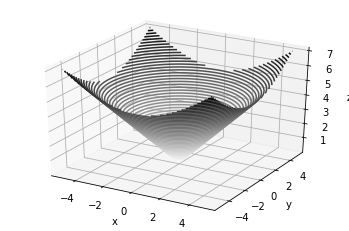

In [26]:
#graficamente
def f(x, y):
    return np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
def Gradient(X):
  return np.array( [ [fx.diff(x0).subs( [(x0, float(X[0])), (x1, float(X[1]))]  )], [fx.diff(x1).subs( [(x0, float(X[0])), (x1, float(X[1]))]  ) ] ] )  

def Direction(X):  
  dy = -1 * Gradient(X)
  return dy

def Step_Size(X, alpha, ro, c):
  counter = 0
  origen_0 = fx.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()
  f_k = origen_0
  
  pk = Direction(X)
  
  g = Gradient(X)

  while True:
    dato1 = X  + (alpha * pk)
    destino = fx.subs([(x0, float(dato1[0])), (x1, float(dato1[1]))]).doit()

    dato3 = (c * alpha) * np.dot(g.T, pk)
    penal_0 = dato3[0,0]

    f_n = round(float(destino), 6)
    penalty = round(float(penal_0), 6)

    if (f_n <= f_k + penalty) or (counter>100):
      return alpha

    alpha = round(ro * alpha, 6)
    counter = counter + 1


In [ ]:
prev_val = 1000000
epsilon = 0.00001
counter=0
max_value=1000

while True:
  pk = Direction(X)

  alpha = Step_Size(X, alpha, ro, c)

  Xn = X + (alpha * pk) 
  actual_val = fx.subs([ (x0, float(Xn[0])), (x1, float(Xn[1])) ] )

  if (round(abs(actual_val - prev_val), 6)<epsilon) or (counter>=max_value):
    break

  X = Xn
  prev_val=actual_val
  counter = counter + 1

print('Xn={}'.format(Xn))
print('f(Xn)={}'.format(actual_val))
print('i={}'.format(counter))

Xn=[[0.0133738191574241]
 [-0.00861503688054924]]
f(Xn)=0.000253077899308706
i=499
